In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cupy as cp
import numpy as np
import matplotlib.pyplot
from cupyx.scipy.spatial.distance import cdist
from rosenbaum import *
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

In [15]:
samples_A = [np.random.normal(0, 2, 2) for _ in range(10)]
samples_B = [np.random.normal(1, 1, 2) for _ in range(10)]

groups = ["A"] * 10 + ["B"] * 10

samples = samples_A + samples_B
distances = cdist(samples, samples)

G = nx.from_numpy_array(distances)
matching = nx.min_weight_matching(G)

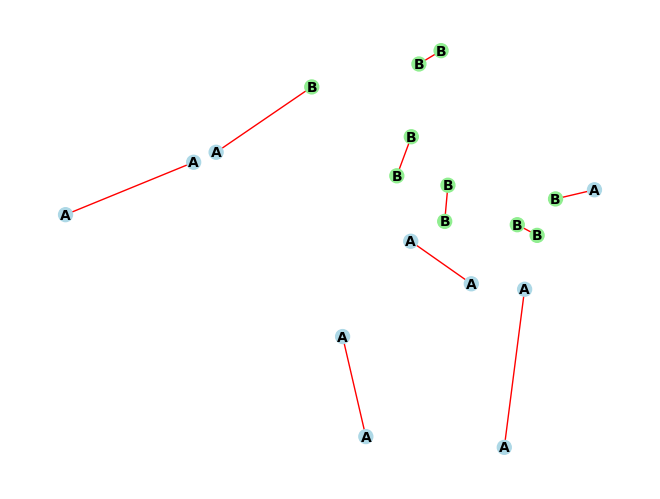

In [16]:
node_colors = ['lightblue' if group == 'A' else 'lightgreen' for group in groups]
node_labels = {i: groups[i] for i in range(len(groups))}

matching_graph = G.edge_subgraph(matching)
pos = {i: sample for i, sample in enumerate(samples)}
nx.draw(matching_graph, pos, with_labels=True, node_color=node_colors, node_size=100, font_size=10, font_weight='bold', edge_color='red', labels=node_labels)
plt.show()

In [17]:
p_value, A1 = cross_match_test(groups, matching)

In [18]:
p_value

0.06819805581415489

In [10]:
A1

0